In [1]:
import pandas as pd

df = pd.read_excel('https://recovery.smithschool.ox.ac.uk/wp-content/uploads/2021/05/20210524-Global-Recovery-Observatory-publicv2.xlsx', sheet_name="COVID-19 Measures",
                  na_values=[".."], usecols={'Country', 'Total Value, USD (billions)', 'Clean archetype?', 'Recovery?'})
df

,Country,"Total Value, USD (billions)",Clean archetype?,Recovery?
0,Argentina,0.01,0.0,0.0
1,Argentina,0.00,0.0,0.0
2,Argentina,0.32,0.0,1.0
3,Argentina,0.00,0.0,0.0
4,Argentina,0.00,0.0,0.0
...,...,...,...,...
5463,Ghana,0.00,0.0,1.0
5464,Saint Vincent and the Grenadines,0.00,0.0,0.0
5465,Saint Vincent and the Grenadines,0.02,0.0,1.0
5466,Dominican Republic,0.15,0.0,1.0


# Data wrangling

In [2]:
index = df[df['Recovery?'] != 1].index
rec = df.drop(index, inplace=False)
rec
##rec = rec.drop(rec.index[0])

,Country,"Total Value, USD (billions)",Clean archetype?,Recovery?
2,Argentina,0.32,0.0,1.0
5,Argentina,0.03,0.0,1.0
6,Argentina,0.37,0.0,1.0
12,Argentina,0.00,0.0,1.0
13,Argentina,0.00,0.0,1.0
...,...,...,...,...
5461,Ghana,0.00,0.0,1.0
5462,Ghana,0.00,0.0,1.0
5463,Ghana,0.00,0.0,1.0
5465,Saint Vincent and the Grenadines,0.02,0.0,1.0


In [3]:
rec = rec.groupby(["Country"], as_index=False).sum()
rec

,Country,"Total Value, USD (billions)",Clean archetype?,Recovery?
0,Argentina,6.82,9.0,72.0
1,Australia,130.95,10.0,43.0
2,Austria,1.60,2.0,4.0
3,Bahamas,0.08,0.0,4.0
4,Bangladesh,0.63,4.0,6.0
...,...,...,...,...
76,UAE,0.42,0.0,6.0
77,United Kingdom,391.55,61.0,144.0
78,United States,122.89,7.0,57.0
79,Uruguay,0.00,0.0,1.0


In [4]:
index2 = df[df['Clean archetype?'] != 1].index
greenrec = df.drop(index2, inplace=False)
greenrec

,Country,"Total Value, USD (billions)",Clean archetype?,Recovery?
68,Argentina,0.00,1.0,1.0
81,Argentina,0.00,1.0,1.0
87,Argentina,0.00,1.0,1.0
91,Argentina,0.00,1.0,1.0
106,Argentina,0.00,1.0,1.0
...,...,...,...,...
5359,Bangladesh,0.04,1.0,1.0
5360,Bangladesh,0.04,1.0,1.0
5384,Senegal,0.00,1.0,0.0
5399,Senegal,0.10,1.0,1.0


In [5]:
index = greenrec[greenrec['Recovery?'] != 1].index
greenrec.drop(index, inplace=True)
greenrec

,Country,"Total Value, USD (billions)",Clean archetype?,Recovery?
68,Argentina,0.00,1.0,1.0
81,Argentina,0.00,1.0,1.0
87,Argentina,0.00,1.0,1.0
91,Argentina,0.00,1.0,1.0
106,Argentina,0.00,1.0,1.0
...,...,...,...,...
5346,Dominican Republic,0.00,1.0,1.0
5358,Bangladesh,0.42,1.0,1.0
5359,Bangladesh,0.04,1.0,1.0
5360,Bangladesh,0.04,1.0,1.0


In [6]:
greenrec = greenrec.groupby(["Country"], as_index=False).sum()
greenrec

,Country,"Total Value, USD (billions)",Clean archetype?,Recovery?
0,Argentina,0.00,9.0,9.0
1,Australia,2.30,10.0,10.0
2,Austria,0.38,2.0,2.0
3,Bangladesh,0.55,4.0,4.0
4,Brazil,0.28,3.0,3.0
5,Burkina Faso,0.00,1.0,1.0
6,Canada,21.67,20.0,20.0
7,Chile,0.45,4.0,4.0
8,China,51.88,21.0,21.0
9,Colombia,0.15,5.0,5.0


In [7]:
rec = rec.drop(columns=['Recovery?', 'Clean archetype?'])
rec.head(50)

,Country,"Total Value, USD (billions)"
0,Argentina,6.82
1,Australia,130.95
2,Austria,1.60
3,Bahamas,0.08
4,Bangladesh,0.63
5,Barbados,0.17
6,Belgium,1.23
7,Belize,0.01
8,Bolivia,0.96
9,Brazil,0.54


In [8]:
greenrec = greenrec.drop(columns=['Recovery?', 'Clean archetype?'])
greenrec

,Country,"Total Value, USD (billions)"
0,Argentina,0.00
1,Australia,2.30
2,Austria,0.38
3,Bangladesh,0.55
4,Brazil,0.28
5,Burkina Faso,0.00
6,Canada,21.67
7,Chile,0.45
8,China,51.88
9,Colombia,0.15


In [9]:
merge = greenrec.merge(rec, how='left', left_on='Country', right_on='Country')
merge['Percent'] = (merge['Total Value, USD (billions)_x'] / merge['Total Value, USD (billions)_y']) * 100
merge.rename(columns = {"Total Value, USD (billions)_x" : "Green recovery spending", "Total Value, USD (billions)_y" : "Recovery spending"}, inplace=True)
merge.round({"Percent" : 2})

,Country,Green recovery spending,Recovery spending,Percent
0,Argentina,0.00,6.82,0.00
1,Australia,2.30,130.95,1.76
2,Austria,0.38,1.60,23.75
3,Bangladesh,0.55,0.63,87.30
4,Brazil,0.28,0.54,51.85
5,Burkina Faso,0.00,0.00,NaN
6,Canada,21.67,38.70,55.99
7,Chile,0.45,3.13,14.38
8,China,51.88,427.52,12.14
9,Colombia,0.15,0.32,46.88


# Data Analysis

In [10]:
import seaborn as sns

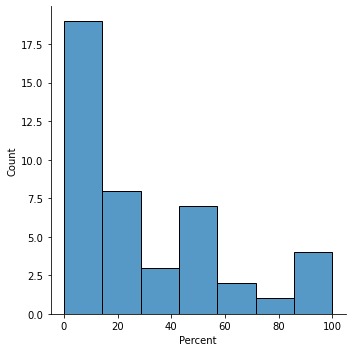

In [11]:
sns.displot(merge['Percent'])